In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [11]:
df['gender'].nunique()

2

In [12]:
df['race_ethnicity'].nunique()

5

In [13]:
df['parental_level_of_education'].nunique()

6

In [14]:
df['lunch'].nunique()

2

In [15]:
df['test_preparation_course'].nunique()

2

In [19]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != object]
categorical_features = [features for features in df.columns if df[features].dtype == object]

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [20]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [23]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20  marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 in writing: {writing_less_20}')
print(f'Number of students with less than 20 in reading: {reading_less_20}')

Number of students with less than 20  marks in Maths: 4
Number of students with less than 20 in writing: 3
Number of students with less than 20 in reading: 1


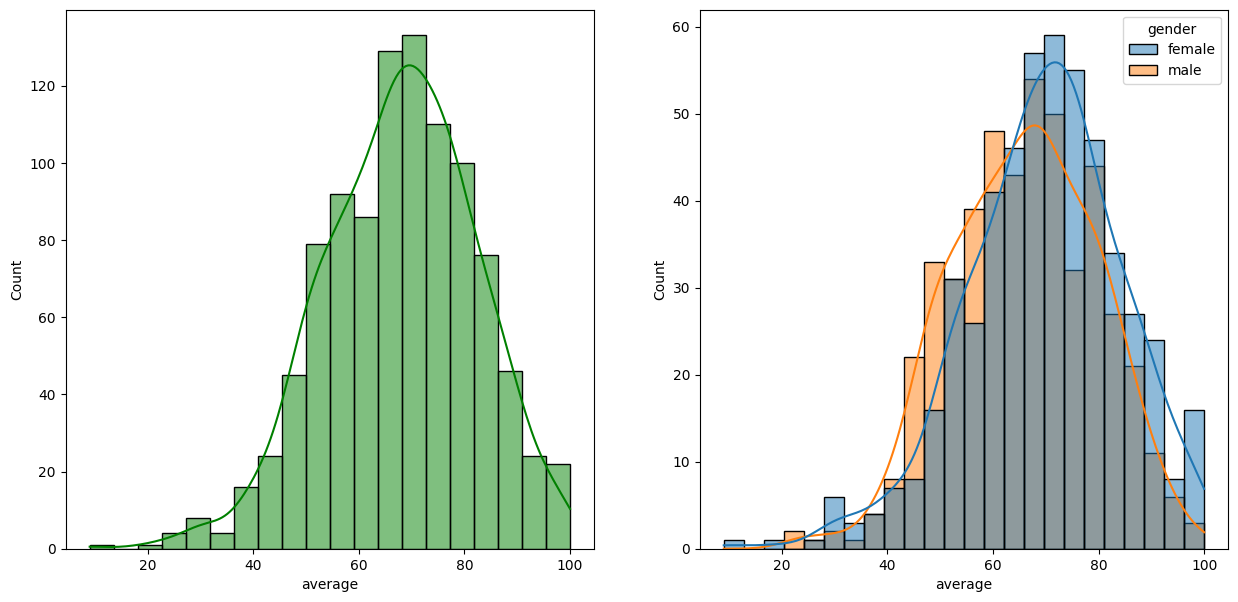

In [29]:
fig , axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data =df, x = 'average', bins=20, kde = True, color='g')
plt.subplot(1,2,2)
sns.histplot(data = df, x= 'average', kde = True, hue='gender')
plt.show()

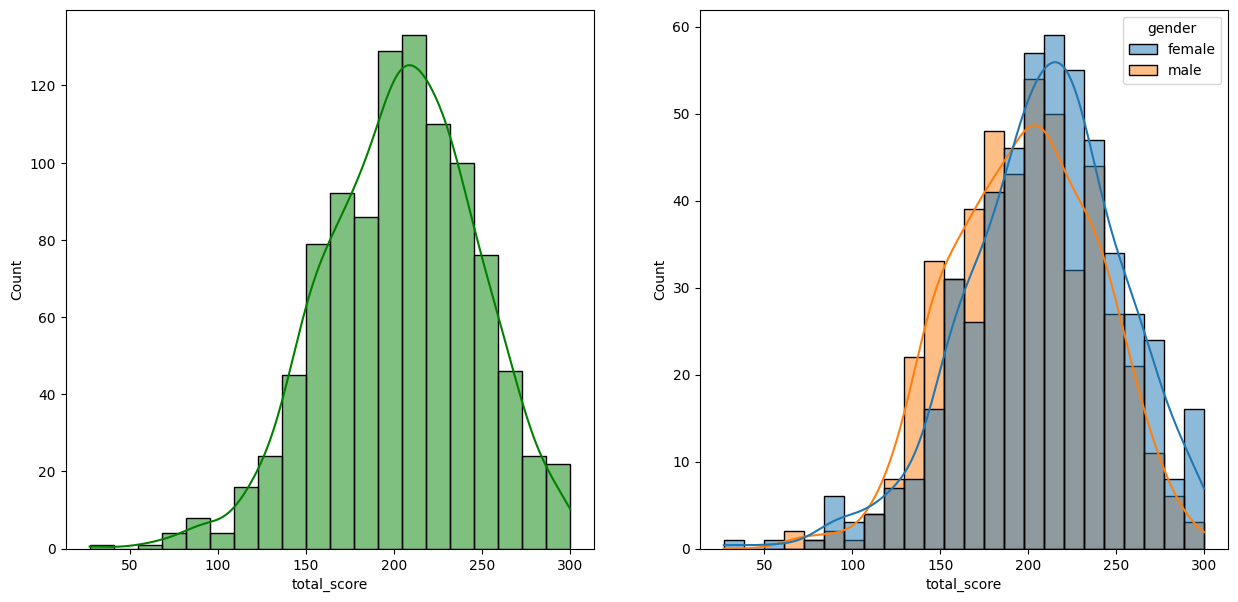

In [32]:
fig , axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data =df, x = 'total_score', bins=20, kde = True, color='g')
plt.subplot(1,2,2)
sns.histplot(data = df, x= 'total_score', kde = True, hue='gender')
plt.show()

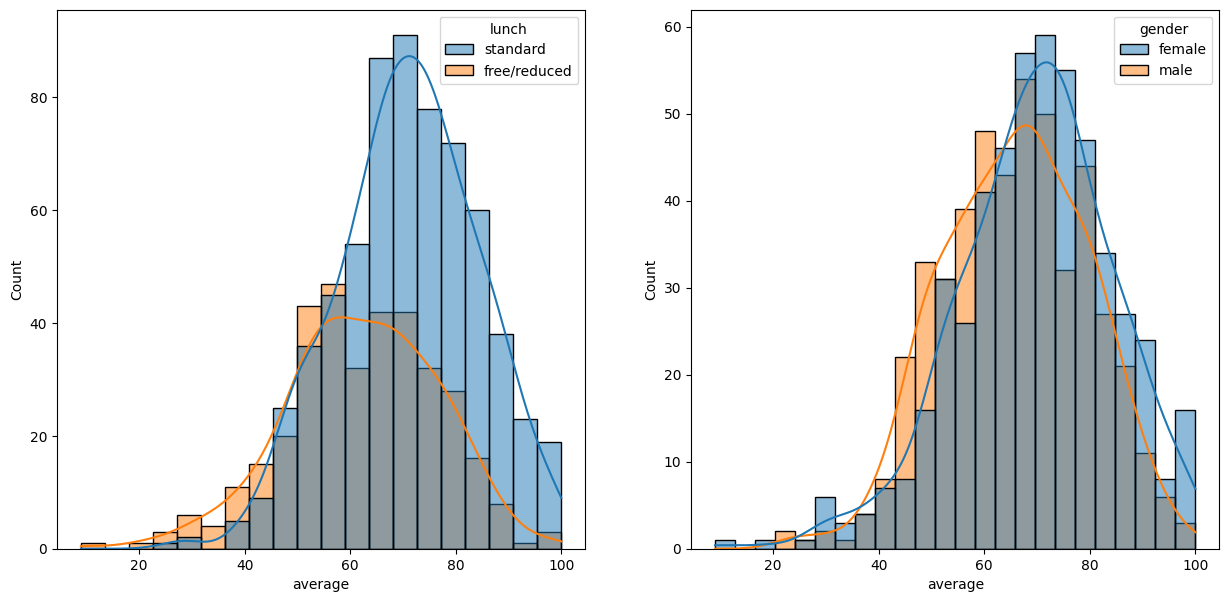

In [35]:
fig , axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data =df, x = 'average', bins=20, kde = True,hue='lunch')
plt.subplot(1,2,2)
sns.histplot(data = df, x= 'average', kde = True, hue='gender')
plt.show()